A présent, nous souhaitons comparer la méthode de réduction de dimension de NMF avec la PCA pour un dataset comprenant des données textuelles.

Nous allons nous appuyer sur "fetch_20newsgroups", une base de données disponible via sklearn, qui regroupe des billets de forums sur 20 sujets différents :

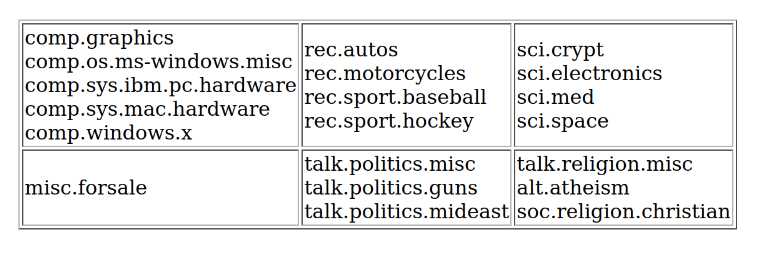

L'intérêt d'utiliser un dataset déjà labelisée avec différentes catégories est de pouvoir les comparer avec les dimensions obtenues via nos deux techniques. Plus précisement, comme le montre le tableau ci-dessus, il y a 20 sujets peuvent être regroupés en 6 grandes thématiques : informatique, sport, science, annonce de ventes, politique et religion.

Au total, 11314 billets ont été enregistrés dans le dataset. Une fois convertis en vecteurs, chaque billet (ou ligne de notre dataset) est décrit par 130107 features. Elles correspondent ici à 130107 tokens (des unigrammes), et sur le rapport entre la fréquence d'apparition des tokens au sein de chaque billet et leur fréquence d'appartion sur l'ensemble du document pour les décrire.

Pour des raisons de puissance de calcul, nous allons nous limiter ici à 6 sujets ('alt.atheism', talk.religion.misc','soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast','talk.politics.misc') correspondant aux thématiques "politique" et "religion". Notre dataset comprend ici 3031 samples décrits par 44134.

Sur la base de ce regroupement a priori en 2 thématiques, on s'attend donc à ce que, dans l'idéal, on observe le meilleur "trade-off" entre le nombre de dimensions retenues et quantité d'informations soient des mots qui soient représentatifs de ces 2 thématiques.
L'avantage de disposer de ce regroupement a priori repose aussi sur le fait que l'interprétation des dimensions obtenues peut être plus facile car on dispose déjà d'une grille de lecture cohérente de nos données. On pourra, par exemple, afficher une matrice de corrélation entre nos x dimensions obtenues et les features de bases. Ainsi, si l'on retient les deux dimensions avec la plus grande part de variance expliquée, on devrait oberver que les features du dataset qui corrèlent le plus avec ces dernières sont des mots associées au champs lexical de la religion pour l'une et au champ lexical de la politique pour l'autre.

RQ : intégrer calcul de corrélation entre dimensions obtenue et les label de bases. 

In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
categories = ['alt.atheism', 'talk.religion.misc','soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast','talk.politics.misc']

In [3]:
newsgroups_train = fetch_20newsgroups(subset='train',categories=categories)

In [4]:
newsgroups_train['target'].shape

(3031,)

On suit la démarche proposée par sklearn pour vectoriser les données.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
vectorizer = TfidfVectorizer()

In [7]:
vectors = vectorizer.fit_transform(newsgroups_train.data)

In [8]:
vectors.shape

(3031, 44134)

In [9]:
categories = ['alt.atheism', 'talk.politics.guns']

In [10]:
newsgroups_train = fetch_20newsgroups(subset='train',categories=categories)

In [11]:
vectors = vectors.toarray()

In [12]:
vectors.shape

(3031, 44134)

In [65]:
###from sklearn import datasets
###vec = datasets.fetch_20newsgroups_vectorized()
###vec.feature_names

In [84]:
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

/home/ph/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/ph/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/ph/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/ph/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/ph/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home

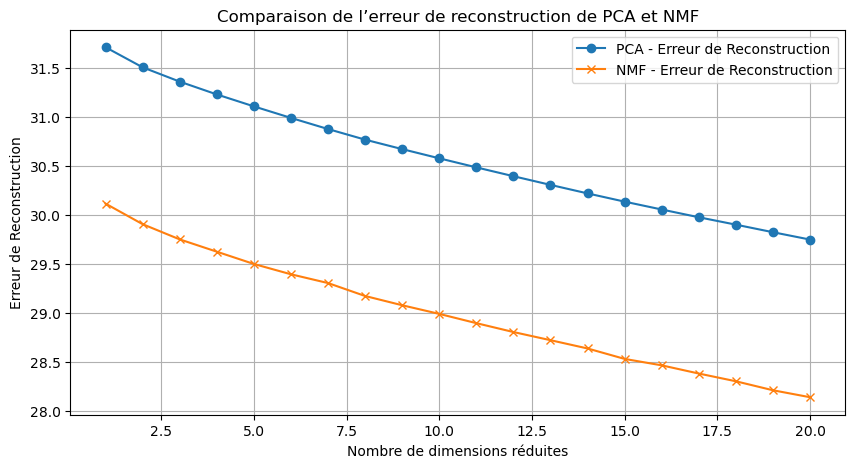

In [91]:
dimensions = list(range(1, 21))
reconstruction_error_pca = []
reconstruction_error_nmf = []

for dim in dimensions:
    pca = PCA(n_components=dim)
    W_pca = pca.fit_transform(vectors)
    reconstructed_pca = W_pca @ pca.components_
    error_pca = np.linalg.norm(vectors - reconstructed_pca, 'fro')
    reconstruction_error_pca.append(error_pca)

    nmf = NMF(n_components=dim, init='random', random_state=0)
    W_nmf = nmf.fit_transform(vectors)
    H_nmf = nmf.components_
    reconstructed_nmf = W_nmf @ H_nmf
    error_nmf = np.linalg.norm(vectors - reconstructed_nmf, 'fro')
    reconstruction_error_nmf.append(error_nmf)

plt.figure(figsize=(10, 5))
plt.plot(dimensions, reconstruction_error_pca, label='PCA - Erreur de Reconstruction', marker='o')
plt.plot(dimensions, reconstruction_error_nmf, label='NMF - Erreur de Reconstruction', marker='x')
plt.xlabel('Nombre de dimensions réduites')
plt.ylabel('Erreur de Reconstruction')
plt.title('Comparaison de l’erreur de reconstruction de PCA et NMF')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
#### PCA uniquement

In [92]:
dimensions = list(range(1,21))
explained_variance_pca = []
explained_variance_nmf = []
for dim in dimensions:
    pca = PCA(n_components=dim)
    pca.fit(vectors)
    explained_variance_pca.append(sum(pca.explained_variance_ratio_))

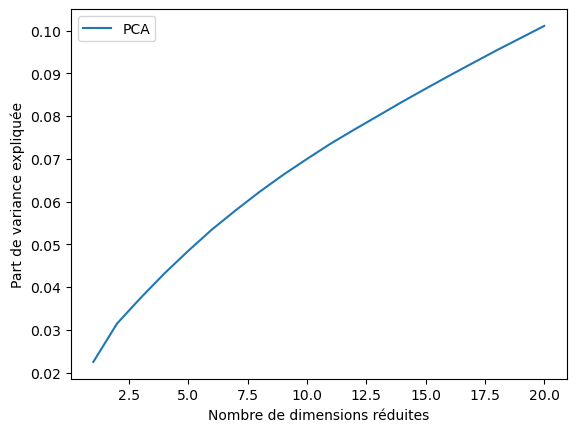

In [56]:
plt.plot(dimensions, explained_variance_pca, label='PCA')
plt.xlabel('Nombre de dimensions réduites')
plt.ylabel('Part de variance expliquée')
plt.legend()
plt.show()

In [94]:
### erreur de reconstruction de NMF uniquement

In [86]:
dimensions = list(range(1,21))
explained_variance_nmf = []
for dim in dimensions:
    nmf = NMF(n_components=dim, init='random', random_state=0)
    W = nmf.fit_transform(vectors)
    H = nmf.components_
    explained_variance_nmf.append(nmf.reconstruction_err_)

/home/ph/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/ph/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/ph/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/ph/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/ph/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home

In [87]:
explained_variance_nmf

[30.113774568850662,
 29.903994473706753,
 29.748693718003807,
 29.62311343958876,
 29.49762747811893,
 29.392393501735025,
 29.302815994380715,
 29.170814174118483,
 29.07631494253108,
 28.98806026649351,
 28.89356515886751,
 28.802865088304685,
 28.719619354814384,
 28.635083520738164,
 28.528371099452496,
 28.46289032682168,
 28.379171682891396,
 28.300190076055987,
 28.20847115884483,
 28.137460328827885]

In [48]:
from sklearn import datasets
vec = datasets.fetch_20newsgroups_vectorized()
vec.feature_names

TypeError: fetch_20newsgroups_vectorized() got an unexpected keyword argument 'categories'

In [23]:
df = pd(vec.data)

TypeError: 'module' object is not callable

In [22]:
import pandas as pd

In [47]:
vec.feature_names

array(['00', '000', '0000', ..., 'íålittin', 'ñaustin', 'ýé'],
      dtype=object)

In [35]:
pd.DataFrame(vec.data)

,0
0,"(0, 5022)\t0.017109647770728872\n (0, 5886)..."
1,"(0, 2336)\t0.07009996372327816\n (0, 3918)\..."
2,"(0, 5043)\t0.042257712736425826\n (0, 6511)..."
3,"(0, 2337)\t0.020747959668163396\n (0, 5022)..."
4,"(0, 3802)\t0.06468462273531508\n (0, 8553)\..."
...,...
11309,"(0, 2337)\t0.1150870675296872\n (0, 6470)\t..."
11310,"(0, 9975)\t0.038152379685825785\n (0, 10165..."
11311,"(0, 26646)\t0.12126781251816648\n (0, 28146..."
11312,"(0, 3411)\t0.06441566264008308\n (0, 9878)\..."


In [39]:
df = pd.DataFrame(vec.data.toarray(), columns=vec.feature_names)

In [40]:
df.head()

,00,000,0000,00000,000000,00000000,0000000004,0000000005,00000000b,00000001,...,çon,ère,ée,égligent,élangea,érale,ête,íålittin,ñaustin,ýé
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
vec.feature_names

array(['00', '000', '0000', ..., 'íålittin', 'ñaustin', 'ýé'],
      dtype=object)

In [42]:
newsgroups_train = fetch_20newsgroups(subset='train',categories=categories)

In [45]:
newsgroups_train

'.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand the other one for testing (or for performance evaluation). The split\nbetween the train and test set is based upon a messages posted before\nand after a specific date.\n\nThis module contains two loaders. The first one,\n:func:`sklearn.datasets.fetch_20newsgroups`,\nreturns a list of the raw texts that can be fed to text feature\nextractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`\nwith custom parameters so as to extract feature vectors.\nThe second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,\nreturns ready-to-use features, i.e., it is not necessary to use a feature\nextractor.\n\n**Data Set Characteristics:**\n\n    =================   ==========\n    Classes                     20\n    Samples total           

In [46]:
newsgroups_train = fetch_20newsgroups(subset='train',categories=categories)

In [ ]:
newsgroups_train.